In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt



grid_search_df = pd.read_excel('Grid_search_0.xlsx')
grid_search_df['avgRewards'] = grid_search_df['avgRewards'].apply(lambda x: ast.literal_eval(x))
grid_search_df.head() # shows top 5 rows

,Unnamed: 0,DQN_model,batch_size,gamma,eps_start,eps_end,eps_decay,learning_rate,memory_buffer,ams_grad,targetnet_update_rate,avgRewards,average_last_100_episodes,best_average_100_episodes,time_of_peak,time_to_convergence
0,0,0,32,0.8,0.8,0,1000,0.0010,1000,True,10,"[0.09090909090909091, 0.3, 0.3, 0.2, 0.2, 0.3,...",0.21,0.33,600,NaN
1,1,0,32,0.8,0.8,0,1000,0.0010,1000,True,50,"[0.18181818181818182, 0.3, 0.1, 0.2, 0.1, 0.3,...",0.30,0.30,670,NaN
2,2,0,32,0.8,0.8,0,1000,0.0010,5000,True,10,"[0.36363636363636365, 0.3, 0.2, 0.3, 0.1, 0.1,...",0.19,0.35,780,NaN
3,5,0,32,0.8,0.8,0,1000,0.0001,1000,True,50,"[0.18181818181818182, 0.1, 0.1, 0.3, 0.4, 0.1,...",0.29,0.36,670,NaN
4,7,0,32,0.8,0.8,0,1000,0.0001,5000,True,50,"[0.09090909090909091, 0.1, 0.3, 0.3, 0.2, 0.3,...",0.31,0.32,390,NaN


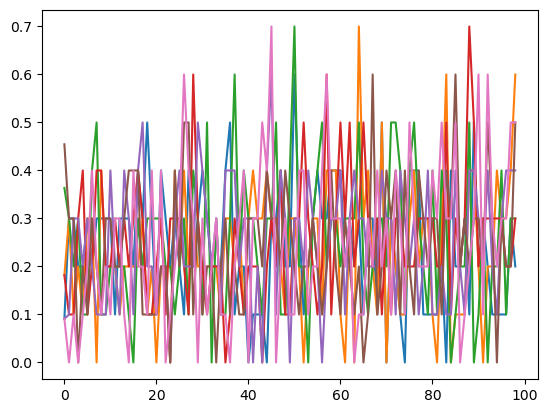

In [3]:
for i, row in grid_search_df.iterrows():
    plt.plot(row['avgRewards'])

In [4]:
grid_search_df.nlargest(10, ['best_average_100_episodes'])

,Unnamed: 0,DQN_model,batch_size,gamma,eps_start,eps_end,eps_decay,learning_rate,memory_buffer,ams_grad,targetnet_update_rate,avgRewards,average_last_100_episodes,best_average_100_episodes,time_of_peak,time_to_convergence
6,9,0,32,0.99,0.8,0,1000,0.0010,1000,True,50,"[0.09090909090909091, 0.0, 0.1, 0.0, 0.1, 0.2,...",0.37,0.37,990,NaN
3,5,0,32,0.80,0.8,0,1000,0.0001,1000,True,50,"[0.18181818181818182, 0.1, 0.1, 0.3, 0.4, 0.1,...",0.29,0.36,670,NaN
2,2,0,32,0.80,0.8,0,1000,0.0010,5000,True,10,"[0.36363636363636365, 0.3, 0.2, 0.3, 0.1, 0.1,...",0.19,0.35,780,NaN
0,0,0,32,0.80,0.8,0,1000,0.0010,1000,True,10,"[0.09090909090909091, 0.3, 0.3, 0.2, 0.2, 0.3,...",0.21,0.33,600,NaN
5,8,0,32,0.99,0.8,0,1000,0.0010,1000,True,10,"[0.45454545454545453, 0.3, 0.3, 0.0, 0.2, 0.1,...",0.28,0.33,930,NaN
4,7,0,32,0.80,0.8,0,1000,0.0001,5000,True,50,"[0.09090909090909091, 0.1, 0.3, 0.3, 0.2, 0.3,...",0.31,0.32,390,NaN
1,1,0,32,0.80,0.8,0,1000,0.0010,1000,True,50,"[0.18181818181818182, 0.3, 0.1, 0.2, 0.1, 0.3,...",0.30,0.30,670,NaN
